In [1]:
using Plots
using CSV
using DataFrames
using Glob
using JLD2
using ProgressMeter
using Printf

In [2]:
using GalaxySim

[ Info: Precompiling GalaxySim [acb07f55-bd29-4b0d-84d7-cda6267f5828]


In [62]:
particles = []

for file in glob("data/*.dat")
    df = CSV.read(file, DataFrame)[1:1:end, :]
    push!(particles, df)
end

In [63]:
N = length(particles)
Nt = size(particles[1])[1]


function get_col(col)
    arr = zeros(N, Nt)
    
    for n in 1:N
        for i in 1:Nt
            arr[n, i] = particles[n][i, col]
        end
    end
    return arr
end


get_col (generic function with 1 method)

In [64]:
x1s = get_col("x1")
x2s = get_col("x2");
ρs = get_col("ρ")

1000×157 Matrix{Float64}:
 1.47759e-8   0.000295846  0.000295846  …  3.80411e-5   3.80411e-5
 0.0256387    0.0254087    0.0252711       0.148624     0.154444
 0.0505927    0.0515424    0.0530729       0.0616894    0.0596761
 1.47759e-8   1.47759e-8   1.47759e-8      1.47759e-8   1.47759e-8
 1.47759e-8   3.68959e-5   3.68959e-5      0.000110452  0.000110452
 0.00263645   0.00263645   0.00270828   …  0.0114701    0.0107629
 0.0153482    0.0150461    0.014289        0.227245     0.239078
 1.47759e-8   1.47759e-8   1.47759e-8      1.47759e-8   1.47759e-8
 1.47759e-8   1.47759e-8   1.47759e-8      1.47759e-8   1.47759e-8
 9.41206      9.99645      5.79497         0.880439     0.985003
 0.00110591   0.00110591   0.00110591   …  0.000738977  0.000716806
 0.0410892    0.0413973    0.0418071       0.0164476    0.0166125
 0.0451823    0.0434755    0.041964        0.299866     0.287795
 ⋮                                      ⋱  ⋮            
 0.729804     0.656963     0.578612        0.464711    

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04
[ Info: Saved animation to /home/daniel/.julia/dev/GalaxySim/tmp.gif


Plots.AnimatedGif("/home/daniel/.julia/dev/GalaxySim/tmp.gif")
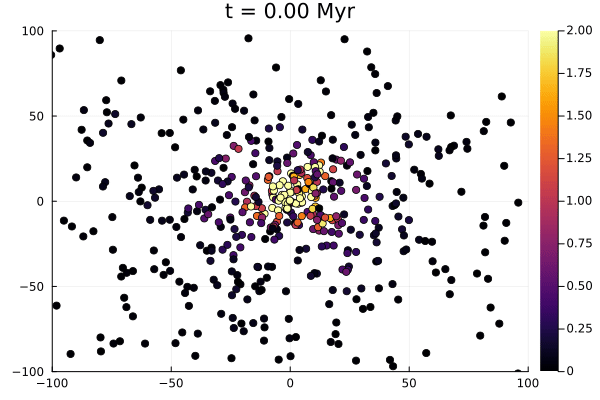

In [65]:
prog = Progress(Nt)

Rv = 100

function plot_gal(x, y, c, Rv, t)    
    scatter(x, y, marker_z=c, clim=(0, 2), xlim=[-Rv, Rv], ylim=[-Rv, Rv], legend=false, colorbar=true)
    title!(@sprintf("t = %2.2f Myr", t/1e6yr))  
end


@gif for i ∈ 1:1:Nt
    filt = x1s[:, i] .< Rv
    plot_gal(x1s[filt, i], x2s[filt, i], ρs[filt, i], Rv, i)
    next!(prog)
end